# Using Eradiate to visualize the effects of an atmosphere

Using the one dimensional solver we can compute and visualize the effects of an atmosphere over a non isotropically scattering surface.
We simulate a quasi one dimensional scenario with a surface employing the `RPV` scattering model 
covered by a purely rayleigh scattering atmospher eof different scattering cross section.

Eventually we create a series of plots with Eradiate's visualization facilities to qualitatively assert the effect of the scattering cross section on ToA leaving radiance.

## Imports

### Non Eradiate libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Eradiate kernel and variant

In [2]:
import eradiate.kernel
eradiate.kernel.set_variant("scalar_mono_double")

### Solver and scene building facilities

In [3]:
# The rayleigh solver application
from eradiate.solvers.onedim import OneDimSolver

# Scene building facilities
from eradiate.scenes import SceneDict
from eradiate.scenes.lithosphere import RPV
from eradiate.scenes.atmosphere import RayleighHomogeneous
from eradiate.scenes.illumination import Directional

## The set of sigma values to simulate

To show the effect of the rayleigh atmosphere over an anisotropic surface, we define a set of five values for the scattering coefficients

In [4]:
sigmas = [1e-3, 5e-3, 1e-2, 5e-2, 1e-1] # [1/km]

## Set up the actual scenes and run the simulation

In [28]:
results = list()
# loop over the sigma values

scene_width = 200
for sigma in sigmas:
    
    # create the scene for each sigma value
    solver = OneDimSolver(SceneDict.empty().add([
        RPV({
            "type": "rpv",
            "rho_0": 0.183,
            "k": 0.780,
            "ttheta": -0.1,
            "width": scene_width
        }),
        RayleighHomogeneous({
            "sigma_s": sigma,
            "height": 40.,
            "width": scene_width
        }),
        Directional({
            "zenith": 30.,
            "azimuth": 0.,
            "irradiance": 1.0e+6 # [W/km^2/nm]
        }),
        {"integrator": {"type": "volpath"}}
    ]))
    
    # define the observation angles to simulate
    zenith_grid = np.arange(0., 90., 10.)
    azimuth_grid = np.arange(0., 360.1, 10.)

    # run the simulation and append the results to the results list
    results.append(solver.run(
        vza=zenith_grid, 
        vaa=azimuth_grid,
        spp=2048
    ))

## Set up 5 subplots and display them

Text(0.5, 1.1, '$o_t = 4$')

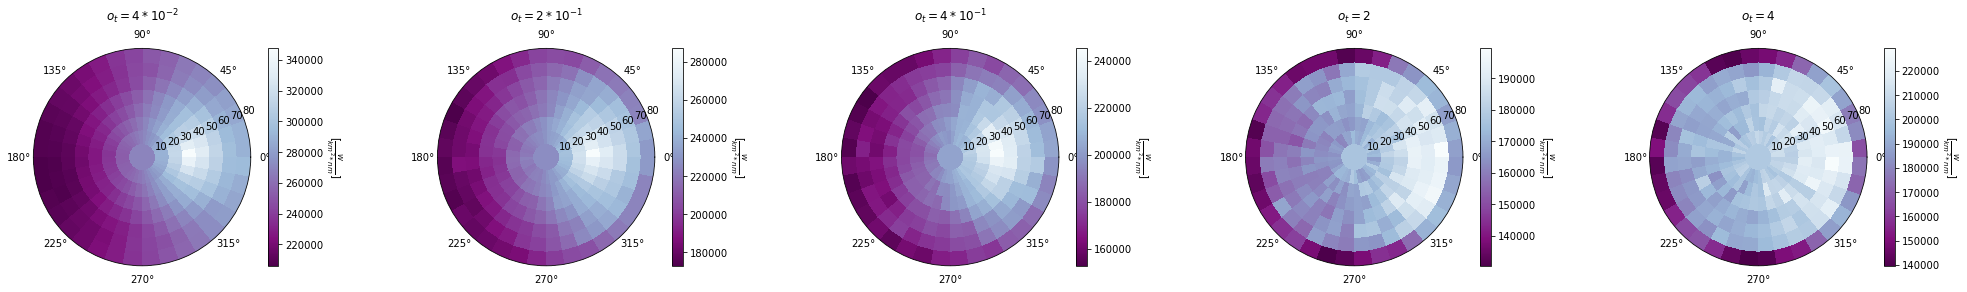

In [29]:
fig, axs = plt.subplots(1, 5, figsize=(35, 4), subplot_kw=dict(projection='polar'))

# Add the results to the plots
r, theta = np.meshgrid(zenith_grid, np.radians(azimuth_grid))

pcm0 = axs[0].pcolormesh(theta, r, np.transpose(results[0]), cmap="BuPu_r")
pcm1 = axs[1].pcolormesh(theta, r, np.transpose(results[1]), cmap="BuPu_r")
pcm2 = axs[2].pcolormesh(theta, r, np.transpose(results[2]), cmap="BuPu_r")
pcm3 = axs[3].pcolormesh(theta, r, np.transpose(results[3]), cmap="BuPu_r")
pcm4 = axs[4].pcolormesh(theta, r, np.transpose(results[4]), cmap="BuPu_r") 

# Add colorbars
cbar0 = plt.colorbar(pcm0, ax=axs[0])
cbar0.set_label(r"$[\frac{W}{km^2*nm}]$", rotation=270, labelpad=20)
cbar1 = plt.colorbar(pcm1, ax=axs[1])
cbar1.set_label(r"$[\frac{W}{km^2*nm}]$", rotation=270, labelpad=20)
cbar2 = plt.colorbar(pcm2, ax=axs[2])
cbar2.set_label(r"$[\frac{W}{km^2*nm}]$", rotation=270, labelpad=20)
cbar3 = plt.colorbar(pcm3, ax=axs[3])
cbar3.set_label(r"$[\frac{W}{km^2*nm}]$", rotation=270, labelpad=20)
cbar4 = plt.colorbar(pcm4, ax=axs[4])
cbar4.set_label(r"$[\frac{W}{km^2*nm}]$", rotation=270, labelpad=20)

# Set the plot titles
axs[0].set_title(r"$o_t = 4*10^{-2}$", y=1.1)
axs[1].set_title(r"$o_t = 2*10^{-1}$", y=1.1)
axs[2].set_title(r"$o_t = 4*10^{-1}$", y=1.1)
axs[3].set_title(r"$o_t = 2$", y=1.1)
axs[4].set_title(r"$o_t = 4$", y=1.1)